<a href="https://colab.research.google.com/github/hugocbs/IGTI-Machine-Lerning/blob/master/Draft_Trab_Prat_Mod_3_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Carregando o dataset
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data[:, :2]  # pegamos as primeiras duas features aqui. Pegue as outras se quiser
y = iris.target

y[0]  # classe do primeiro elemento
X[:1, :]  # primeiro elemento a classificar

array([[5.1, 3.5]])

In [3]:
iris.data.shape

(150, 4)

In [5]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [4]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.figure(2, figsize=(8, 6))
plt.clf()

<Figure size 576x432 with 0 Axes>

([], <a list of 0 Text major ticklabel objects>)

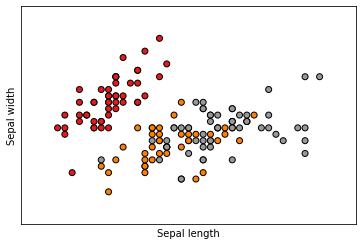

In [16]:
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

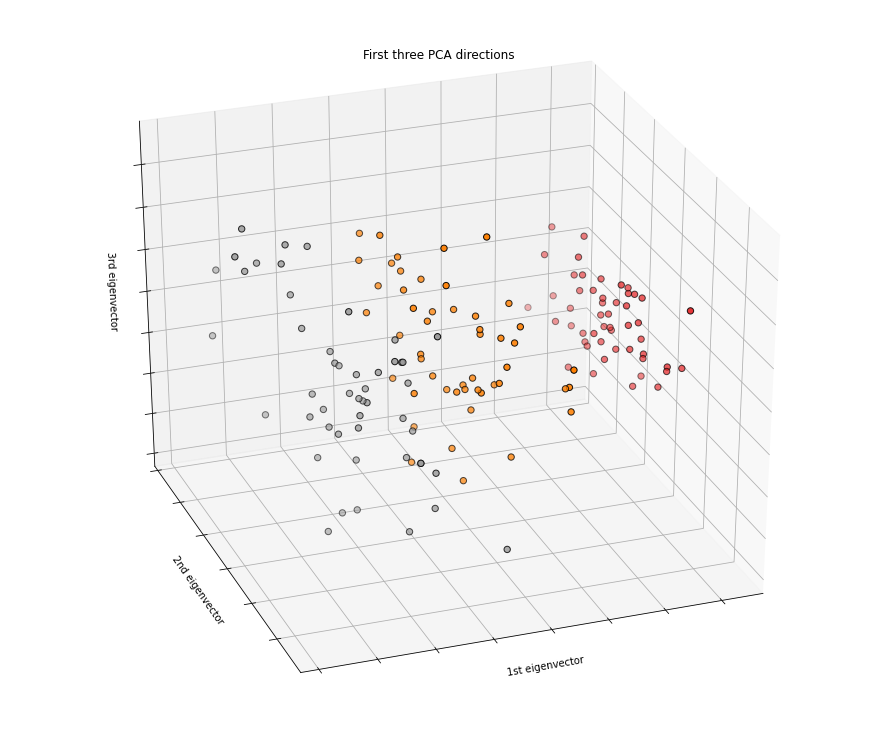

In [17]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(12, 10))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [19]:
# ---------------------------

# É preciso treinar o classificador, e testar o seu desempenho com dados "novos"
# Aqui, dividimos os dados em treino e teste, para podermos testar nosso desempenho depois
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Carregando e treinando os classficadores
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

# Métricas do Random Forest

from sklearn.metrics import accuracy_score, recall_score, precision_score

rfc_acc = round(accuracy_score(y_test, y_pred), 4) # round é para arredondar
rfc_recall = round(recall_score(y_test, y_pred, average='weighted'), 4)
rfc_precision = round(precision_score(y_test, y_test, y_pred, average='weighted'), 4)

# ------------------------

In [20]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Métricas do KNN
knn_acc = round(accuracy_score(y_test, y_pred), 4) # round é para arredondar
knn_recall = round(recall_score(y_test, y_pred, average='weighted'), 4)
knn_precision = round(precision_score(y_test, y_test, y_pred, average='weighted'), 4)

#-----------------------

In [21]:
# Comparação
print("KNN vs Random Forest\n")
print("Classes: {0}\n".format(iris.target_names))
print("Acuracia: {0} vs {1}".format(knn_acc, rfc_acc))
print("Recall: {0} vs {1}".format(knn_recall, rfc_recall))
print("Precision: {0} vs {1}".format(knn_precision, rfc_precision))

# ---------------------

KNN vs Random Forest

Classes: ['setosa' 'versicolor' 'virginica']

Acuracia: 0.76 vs 0.74
Recall: 0.76 vs 0.74
Precision: 1.0 vs 1.0


In [23]:
# Na Validação Cruzada
from sklearn.model_selection import cross_val_score
cv_rfc = cross_val_score(rfc, X, y)
cv_knn = cross_val_score(knn, X, y)
print("\nValidação Cruzada: {0} vs {1}".format(cv_knn, cv_rfc))


Validação Cruzada: [0.66666667 0.8        0.63333333 0.86666667 0.66666667] vs [0.73333333 0.73333333 0.66666667 0.8        0.73333333]


In [24]:
sum_cv_rfc = 0
for cv_score in cv_rfc:
  sum_cv_rfc += cv_score

print("\Resultado Random Forest: {0}".format(sum_cv_rfc/5))

\Resultado Random Forest: 0.7333333333333334


In [8]:
sum_cv_knn = 0
for cv_score in cv_knn:
  sum_cv_knn += cv_score

print("\nResultado KNN: {0}".format(sum_cv_knn/5))


Resultado KNN: 0.7266666666666667


In [9]:
#Buscando Hiperparâmetros
from sklearn.model_selection import GridSearchCV

#RFC
parameters = {'min_samples_split':(2,6)}
rfc_hps = GridSearchCV(rfc, parameters)
rfc_hps.fit(X, y)
print("Melhor valor para min_samples_split: {0}".format(rfc_hps.best_params_['min_samples_split']))

Melhor valor para min_samples_split: 6


In [10]:
#KNN
parameters = {'n_neighbors':(1,20)}
knn_hps = GridSearchCV(knn, parameters)
knn_hps.fit(X , y)
knn_hps.best_params_['n_neighbors']
print("Melhor valor para n_neighbors: {0}".format(knn_hps.best_params_['n_neighbors']))

Melhor valor para n_neighbors: 20
